# Projet SOIA 6.1 - PINN
## Oscar Agnus, SOIA A3


This is just an application of the codes found in "Physics-Based Deep Learning", made by N. Thuerey and al.

### Standard approach

In [143]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [134]:
# X-Data
N = 200
X = np.random.random(N)

In [135]:
# Generation Y-Data
sign = (- np.ones((N,)))**np.random.randint(2,size=N)
Y = np.sqrt(X) * sign

In [136]:
# Neural network
act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
tf.keras.layers.Dense(10, activation=act),
tf.keras.layers.Dense(1,activation='linear')])
    
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

In [137]:
# Training
results_sv = nn_sv.fit(X, Y, epochs=10, batch_size= 5, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.5101
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4838
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4684
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4560
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5065
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5344
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5161
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4828
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5076
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5011


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


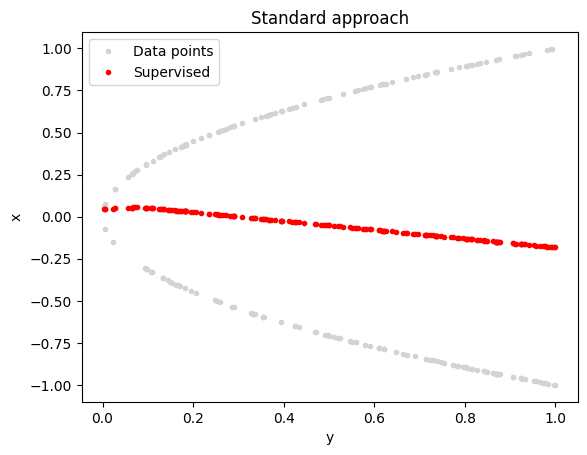

In [138]:
# Results
plt.plot(X,Y,'.',label='Data points', color="lightgray")
plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()

This method averages the data between the two modes. This is not satisfactory.

### Differential Physics approach

In [139]:
# X-Data
# X = X , we can directly re-use the X from above, nothing has changed...
# Y is evaluated on the fly
# Model
nn_dp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation=act, input_shape=(1,)),
    tf.keras.layers.Dense(100, activation=act),
    tf.keras.layers.Dense(100, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')])

In [140]:
#Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true,y_pred**2)
optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

In [141]:
#Training
results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1746
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2175e-04
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9385e-04
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8266e-04


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


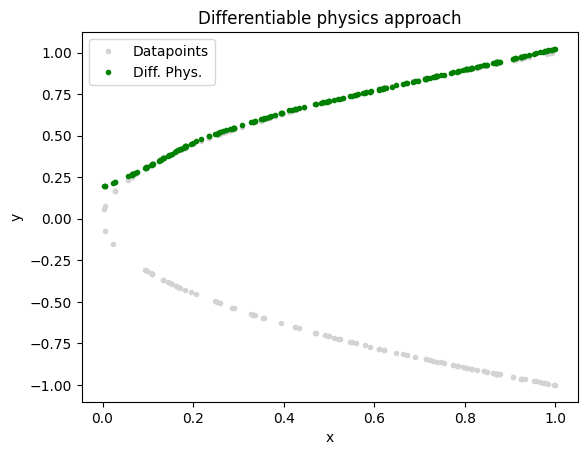

In [142]:
# Results
plt.plot(X,Y,'.',label='Datapoints', color="lightgray")
#plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") # optional for comparison
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
plt.show()